In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from naive_bayes_classifier import NaiveBayes
from sklearn.metrics import confusion_matrix

In [2]:
# Load the inflammation diagnosis dataset using semicolon as the delimiter
data = pd.read_csv('inflammation_diagnosis.csv', delimiter=';')

In [3]:
# Print the first few rows and the column names to verify the structure
print("Dataset structure after parsing with semicolon:")
print(data.info())
print(data.head())

Dataset structure after parsing with semicolon:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature         120 non-null    float64
 1   nausea              120 non-null    object 
 2   lumbar_pain         120 non-null    object 
 3   urine_pushing       120 non-null    object 
 4   micturition_pains   120 non-null    object 
 5   burning_of_urethra  120 non-null    object 
 6   inflammation        120 non-null    object 
 7   nephritis           120 non-null    object 
dtypes: float64(1), object(7)
memory usage: 7.6+ KB
None
   temperature nausea lumbar_pain urine_pushing micturition_pains  \
0         35.5     no         yes            no                no   
1         35.9     no          no           yes               yes   
2         35.9     no         yes            no                no   
3         36.0     no    

In [4]:
# Check if 'inflammation' and 'nephritis' exist, and handle them properly
if 'inflammation' in data.columns and 'nephritis' in data.columns:
    # Create the 'disease' column
    data['disease'] = data.apply(lambda row: row['inflammation'] == 'yes' or row['nephritis'] == 'yes', axis=1)

    # Print the first few rows of the new 'disease' column to verify its correctness
    print("\nPreview of the 'disease' column after combining 'inflammation' and 'nephritis':")
    print(data[['inflammation', 'nephritis', 'disease']].head())

else:
    print("The dataset does not contain the expected columns 'inflammation' and 'nephritis'.")
    print("Columns found:", data.columns)


Preview of the 'disease' column after combining 'inflammation' and 'nephritis':
  inflammation nephritis  disease
0           no        no    False
1          yes        no     True
2           no        no    False
3          yes        no     True
4           no        no    False


In [5]:
infla = data[data.columns]

# Drop the original columns 'inflammation' and 'nephritis' as per instructions
data = data.drop(columns=['inflammation', 'nephritis'])

In [6]:
# Proceed with train/test split using the 'disease' column as the target
X = data.drop(columns=['disease'])
y = data['disease']

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Train the Naive Bayes classifier
nb = NaiveBayes()
nb.fit(X_train, y_train)

In [8]:
# Evaluate the classifier on the test set
y_pred = nb.evaluate_on_data(X_test, y_test)

Accuracy: 100.00%


In [9]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

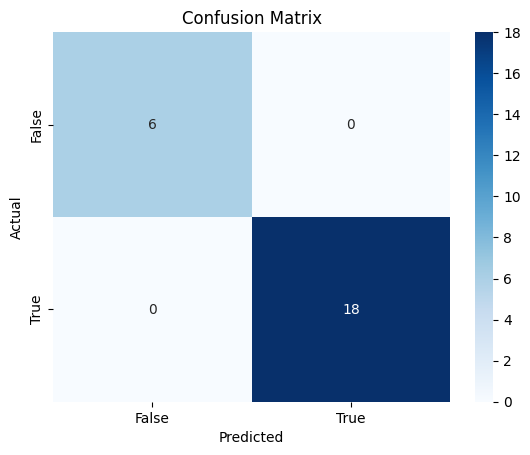

In [10]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [11]:
infla

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,inflammation,nephritis,disease
0,35.5,no,yes,no,no,no,no,no,False
1,35.9,no,no,yes,yes,yes,yes,no,True
2,35.9,no,yes,no,no,no,no,no,False
3,36.0,no,no,yes,yes,yes,yes,no,True
4,36.0,no,yes,no,no,no,no,no,False
...,...,...,...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes,no,yes,True
116,41.5,no,no,no,no,no,no,no,False
117,41.5,yes,yes,no,yes,no,no,yes,True
118,41.5,no,yes,yes,no,yes,no,yes,True
